## Needed imports

In [1]:
import pygad
import numpy
import time


## Setup initial values

In [2]:
S = [
    (100, 7),
    (300,7),
    (200,6),
    (40,2),
    (500,5),
    (70,6),
    (100,1),
    (250,3),
    (300,10),
    (280,3),
    (300,15)
]
#definiujemy parametry chromosomu
#geny to liczby: 0 lub 1
gene_space = [0, 1]


## Define fitness function

In [3]:
#definiujemy funkcję fitness
def fitness_func(solution, solution_idx):
    return_value = 0
    return_weight = 0
    for index, value in enumerate(solution):
        if value == 1:
            return_value += S[index][0]
            return_weight += S[index][1]
        else:
            continue
    if return_weight > 25:
        return_value = 0
    return return_value

## Define all values required in pygad.GA function

In [4]:
fitness_function = fitness_func
#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 10
num_genes = len(S)
#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 5
num_generations = 30
keep_parents = 2
#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"
#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"
#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 10

## Run the genetic algorithm AI training

In [5]:
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria="reach_1600")

#uruchomienie algorytmu
start = time.time()
print("hello")

ga_instance.run()
print(ga_instance.generations_completed)

hello
8


# Final results

0.13904762268066406
[0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
[(100, 7), (300, 7), (200, 6), (40, 2), (500, 5), (70, 6), (100, 1), (250, 3), (300, 10), (280, 3), (300, 15)]
Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630


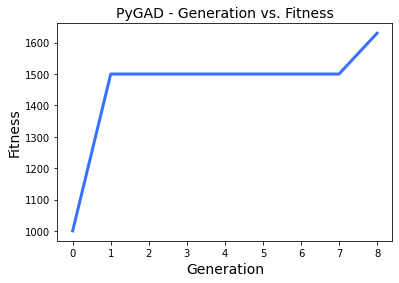

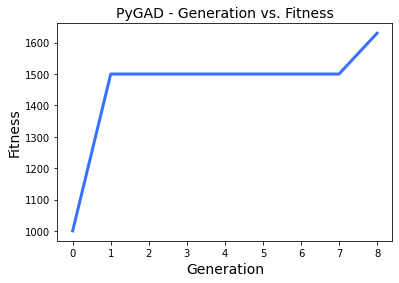

In [6]:
end = time.time()
print(end - start)

#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution)
print(S)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

#tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
# THESE LINES BELOW BUG THE CODE
# prediction = numpy.sum(S*solution)
# print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

### Final time results
    1. 0.04699
    2. 0.05299
    3. 0.03812
    4. 0.04267
    5. 0.04899
    6. 0.04940
    7. 0.04600
    8. 0.04499
    9. 0.03883
    10. 0.04499

Everage runtime: 0.045397s